# Part 1: Using Naïve Bayes to work with Text Data 

Part 1: Using Naïve Bayes to work with Text Data 

In [ ]:
#Representing text as data 
#.Given a simple dataset

#simple_train = ['call you tonight', 'Call me a cab', 'please call me... PLEASE!']
#Learn the 'vocabulary' of the training data: convert text into a matrix of token counts.
#Transform training data into a 'document-term matrix' (which is a sparse matrix).

#Print the sparse matrix.

#Convert the sparse matrix to a dense matrix (Tip: you can use “toarray()”)
#Examine the vocabulary and document-term matrix together

#Transform testing data into a document-term matrix (using existing vocabulary)
#       use the test data as:
#       simple_test = ["please don't call me"]

#Examine the vocabulary and document-term matrix together

In [52]:
#IMPORTING

import pandas as pd
import numpy as np
from sklearn.feature_extraction.text import CountVectorizer


#CountVectorizer. 

simple_train = ['call you tonight', 'Call me a cab', 'please call me... PLEASE!']
mod = CountVectorizer()
simple_train_st=mod.fit_transform(simple_train)
simple_train_st
mod.get_feature_names()
simple_train = ['call you tonight', 'Call me a cab', 'please call me... PLEASE!']
vect = CountVectorizer()
a = vect.fit(simple_train)
a.get_feature_names()

['cab', 'call', 'me', 'please', 'tonight', 'you']

In [53]:
#converting the training dataset into an an array of dense matrix and then converting it into a dataframe using feature names
simple_train_st.toarray()
df=pd.DataFrame(simple_train_st.toarray(),columns=mod.get_feature_names())
df

,cab,call,me,please,tonight,you
0,0,1,0,0,1,1
1,1,1,1,0,0,0
2,0,1,1,2,0,0


In [54]:
#test data to dense matrix

simple_test = ["please don't call me"]
simple_test_sp = mod.transform(simple_test)
simple_test_sp.toarray()

array([[0, 1, 1, 1, 0, 0]], dtype=int64)

In [55]:
# dense matrix of test data to dataframe
x = pd.DataFrame( simple_test_sp.toarray(), columns = mod.get_feature_names())
print(x)

   cab  call  me  please  tonight  you
0    0     1   1       1        0    0


# Part 2.Analyzing SMS data with Naïve Bayes


In [ ]:
#Read into the data from the file “sms.tsv”; give the names of columns as ['label', 'message']; and print the first 10 samples to view part of the data.
#Convert label to a numeric variable.

#Then define the X and y

#Split into training and testing sets by train_test_split(); and print the shape of training set and test set.

#Use the two Naïve Bayes models (GaussianNB and MultinomialNB) to finish the following requirements, respectively:

#calculate accuracy of predictions
#give the confusion matrix
#print message text for the false positives
#print message text for the false negatives

In [56]:
import pandas as pd

#renaming it as  ['label','message'] and printing the first 10 data

columns=["label","message"]
df = pd.read_csv('C:/Users/admin/sms.tsv',sep='\t',names=columns)
df
print("First 10 rows of the DataFrame:")
print(df.head(10))
print("\n**************************************************************************************")


First 10 rows of the DataFrame:
  label                                            message
0   ham  Go until jurong point, crazy.. Available only ...
1   ham                      Ok lar... Joking wif u oni...
2  spam  Free entry in 2 a wkly comp to win FA Cup fina...
3   ham  U dun say so early hor... U c already then say...
4   ham  Nah I don't think he goes to usf, he lives aro...
5  spam  FreeMsg Hey there darling it's been 3 week's n...
6   ham  Even my brother is not like to speak with me. ...
7   ham  As per your request 'Melle Melle (Oru Minnamin...
8  spam  WINNER!! As a valued network customer you have...
9  spam  Had your mobile 11 months or more? U R entitle...

**************************************************************************************


In [57]:
#Converting label into numeric variable
from sklearn.preprocessing import LabelEncoder
df['label'] = df.label.map({'ham': 0, 'spam': 1})
print(df)

      label                                            message
0         0  Go until jurong point, crazy.. Available only ...
1         0                      Ok lar... Joking wif u oni...
2         1  Free entry in 2 a wkly comp to win FA Cup fina...
3         0  U dun say so early hor... U c already then say...
4         0  Nah I don't think he goes to usf, he lives aro...
...     ...                                                ...
5567      1  This is the 2nd time we have tried 2 contact u...
5568      0               Will ü b going to esplanade fr home?
5569      0  Pity, * was in mood for that. So...any other s...
5570      0  The guy did some bitching but I acted like i'd...
5571      0                         Rofl. Its true to its name

[5572 rows x 2 columns]


the shape of training data set is (4457,) 
the shape of training data set is (1115,) 
the shape of training data set is (4457,) 
the shape of training data set is (1115,) 
Wall time: 965 ms
Wall time: 2 ms
Accuracy of GaussNB Model:  0.9022421524663677
Accuracy of MultiNB Model: 0.9901345291479821

******************************Confusion Matrix for GaussianNB:***********************************************


Text(89.18, 0.5, 'Predicted Value')

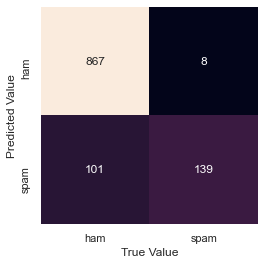

In [58]:
#Now--> X and y and splitting into training and test sets and printing the shape of training and test sets
#Importing Train_Test_Split

X=df['message']
Y=df['label']
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.2,random_state=1)
print("the shape of training data set is {} ".format(X_train.shape))
print("the shape of training data set is {} ".format(X_test.shape))
print("the shape of training data set is {} ".format(Y_train.shape))
print("the shape of training data set is {} ".format(Y_test.shape))

from sklearn.pipeline import make_pipeline
from sklearn.naive_bayes import GaussianNB
from sklearn.naive_bayes import MultinomialNB

#Defining Var for Gaussian and Multinomial

g = GaussianNB()
m = MultinomialNB()

#Creating 2 vect for G and M

vectorg = CountVectorizer()
vectorm = CountVectorizer()
X_train_g = vectorg.fit_transform(X_train)
X_test_g = vectorg.transform(X_test)
X_train_m = vectorm.fit_transform(X_train)
X_test_m = vectorm.transform(X_test)

%time g.fit(X_train_g.toarray(), Y_train)
%time m.fit(X_train_g, Y_train)

g_predict = g.predict(X_test_g.toarray())
m_predict = m.predict(X_test_m)

from sklearn.metrics import accuracy_score
print("Accuracy of GaussNB Model: ", accuracy_score(Y_test, g_predict))
print("Accuracy of MultiNB Model:", accuracy_score(Y_test, m_predict))

from sklearn.metrics import confusion_matrix
import seaborn as sns; sns.set()
import matplotlib.pyplot as plt
print("\n******************************Confusion Matrix for GaussianNB:***********************************************")
mat_g = confusion_matrix(Y_test, g_predict)
sns.heatmap(mat_g.T, square = True, annot = True, fmt = 'd', cbar = False,
xticklabels = ('ham','spam'), yticklabels = ('ham','spam'))
plt.xlabel('True Value')
plt.ylabel('Predicted Value')

In [43]:
#Printig the text msg for false positive values:

print("False Positive:\n",X_test[g_predict > Y_test])

print("\n************************************************************************************************")

#Printing the text msg for false negative values:

print("False Negative:\n",X_test[g_predict < Y_test])

False Positive:
 3465                                             My phone
5534                         Ok which your another number
4259                        I am late. I will be there at
1242    I want to show you the world, princess :) how ...
3214                                       What's ur pin?
                              ...                        
995                     I can't, I don't have her number!
4168                          Are you at work right now ?
3376                                                  :) 
3769                               Where are you call me.
4214                     I attended but nothing is there.
Name: message, Length: 101, dtype: object

************************************************************************************************
False Negative:
 3530    Xmas & New Years Eve tickets are now on sale f...
1875    Would you like to see my XXX pics they are so ...
349     Fancy a shag? I do.Interested? sextextuk.com t...
2313    tddnew


************************************Confusion Matrix for MultinomialNB:**************************************************


Text(89.18, 0.5, 'predicted value')

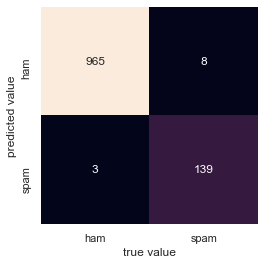

In [12]:
#Now displaying the confusion matrix for MultinomialNB

print("\n************************************Confusion Matrix for MultinomialNB:**************************************************")
m = confusion_matrix(Y_test, m_predict)
sns.heatmap(m.T, square = True, annot = True, fmt = 'd', cbar = False,
xticklabels = ('ham','spam'), yticklabels = ('ham','spam'))
plt.xlabel('true value')
plt.ylabel('predicted value')

In [13]:
#Printing text msg for multinomialNB False Positive

print("False Positive:\n",X_test[m_predict > Y_test])

print("\n*****************************************************************************************")

#Printing text msg for multinomialNB False Negative

print("False Negative:\n",X_test[m_predict < Y_test])

False Positive:
 574               Waiting for your call.
3375             Also andros ice etc etc
45      No calls..messages..missed calls
Name: message, dtype: object

*****************************************************************************************
False Negative:
 3132    LookAtMe!: Thanks for your purchase of a video...
5       FreeMsg Hey there darling it's been 3 week's n...
3530    Xmas & New Years Eve tickets are now on sale f...
684     Hi I'm sue. I am 20 years old and work as a la...
1875    Would you like to see my XXX pics they are so ...
1893    CALL 09090900040 & LISTEN TO EXTREME DIRTY LIV...
4298    thesmszone.com lets you send free anonymous an...
4949    Hi this is Amy, we will be sending you a free ...
Name: message, dtype: object


# Part 2: Linear Regression

In [ ]:
#The Data: import load_boston from sklearn.datasets 

#The Goal: Using Linear Regression on the dataset

#The Tasks:

#1.  First, read into the data and process it in the right format for using machine learning.

#2. Then, use the DataFrame corr() method to show what features are correlated with each other.

#3. The columns don't have any labels. Given the name of columns as ['crim', 'zn', 'indus', 'chas', 'nox', 'rm', 'age', 'dis', 'rad', 'tax', 'ptratio', 'b', 'lstat']; then use the DataFrame corr() again.

#4. Now, you have the numbers from the correlation matrix, but it's not as easy to view or interpret as a plot. Please write codes to plot correlations by color same as (similar with) the following figure

In [44]:
#1)READING DATA

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_boston
from sklearn import linear_model

import seaborn as sns 
%matplotlib inline
x=load_boston()
dataframe=pd.DataFrame(x.data)
dataframe.head()
dataframe.isnull()

,0,1,2,3,4,5,6,7,8,9,10,11,12
0,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,False,False,False,False,False,False,False,False,False,False,False,False,False
502,False,False,False,False,False,False,False,False,False,False,False,False,False
503,False,False,False,False,False,False,False,False,False,False,False,False,False
504,False,False,False,False,False,False,False,False,False,False,False,False,False


In [45]:
#2.Use the DataFrame corr() method to show what features are correlated with each other.
dataframe.corr()

,0,1,2,3,4,5,6,7,8,9,10,11,12
0,1.000000,-0.200469,0.406583,-0.055892,0.420972,-0.219247,0.352734,-0.379670,0.625505,0.582764,0.289946,-0.385064,0.455621
1,-0.200469,1.000000,-0.533828,-0.042697,-0.516604,0.311991,-0.569537,0.664408,-0.311948,-0.314563,-0.391679,0.175520,-0.412995
2,0.406583,-0.533828,1.000000,0.062938,0.763651,-0.391676,0.644779,-0.708027,0.595129,0.720760,0.383248,-0.356977,0.603800
3,-0.055892,-0.042697,0.062938,1.000000,0.091203,0.091251,0.086518,-0.099176,-0.007368,-0.035587,-0.121515,0.048788,-0.053929
4,0.420972,-0.516604,0.763651,0.091203,1.000000,-0.302188,0.731470,-0.769230,0.611441,0.668023,0.188933,-0.380051,0.590879
5,-0.219247,0.311991,-0.391676,0.091251,-0.302188,1.000000,-0.240265,0.205246,-0.209847,-0.292048,-0.355501,0.128069,-0.613808
6,0.352734,-0.569537,0.644779,0.086518,0.731470,-0.240265,1.000000,-0.747881,0.456022,0.506456,0.261515,-0.273534,0.602339
7,-0.379670,0.664408,-0.708027,-0.099176,-0.769230,0.205246,-0.747881,1.000000,-0.494588,-0.534432,-0.232471,0.291512,-0.496996
8,0.625505,-0.311948,0.595129,-0.007368,0.611441,-0.209847,0.456022,-0.494588,1.000000,0.910228,0.464741,-0.444413,0.488676
9,0.582764,-0.314563,0.720760,-0.035587,0.668023,-0.292048,0.506456,-0.534432,0.910228,1.000000,0.460853,-0.441808,0.543993


In [46]:
#3. The columns don't have any labels. Given the name of columns as
#['crim', 'zn', 'indus', 'chas', 'nox', 'rm', 'age', 'dis', 'rad', 'tax', 'ptratio', 'b', 'lstat']; 
#then use the DataFrame corr() again'''

df=pd.DataFrame(x.data,columns=x.feature_names)
df= df.rename(columns=str.lower)
df.corr()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat
crim,1.000000,-0.200469,0.406583,-0.055892,0.420972,-0.219247,0.352734,-0.379670,0.625505,0.582764,0.289946,-0.385064,0.455621
zn,-0.200469,1.000000,-0.533828,-0.042697,-0.516604,0.311991,-0.569537,0.664408,-0.311948,-0.314563,-0.391679,0.175520,-0.412995
indus,0.406583,-0.533828,1.000000,0.062938,0.763651,-0.391676,0.644779,-0.708027,0.595129,0.720760,0.383248,-0.356977,0.603800
chas,-0.055892,-0.042697,0.062938,1.000000,0.091203,0.091251,0.086518,-0.099176,-0.007368,-0.035587,-0.121515,0.048788,-0.053929
nox,0.420972,-0.516604,0.763651,0.091203,1.000000,-0.302188,0.731470,-0.769230,0.611441,0.668023,0.188933,-0.380051,0.590879
rm,-0.219247,0.311991,-0.391676,0.091251,-0.302188,1.000000,-0.240265,0.205246,-0.209847,-0.292048,-0.355501,0.128069,-0.613808
age,0.352734,-0.569537,0.644779,0.086518,0.731470,-0.240265,1.000000,-0.747881,0.456022,0.506456,0.261515,-0.273534,0.602339
dis,-0.379670,0.664408,-0.708027,-0.099176,-0.769230,0.205246,-0.747881,1.000000,-0.494588,-0.534432,-0.232471,0.291512,-0.496996
rad,0.625505,-0.311948,0.595129,-0.007368,0.611441,-0.209847,0.456022,-0.494588,1.000000,0.910228,0.464741,-0.444413,0.488676
tax,0.582764,-0.314563,0.720760,-0.035587,0.668023,-0.292048,0.506456,-0.534432,0.910228,1.000000,0.460853,-0.441808,0.543993


<AxesSubplot:>

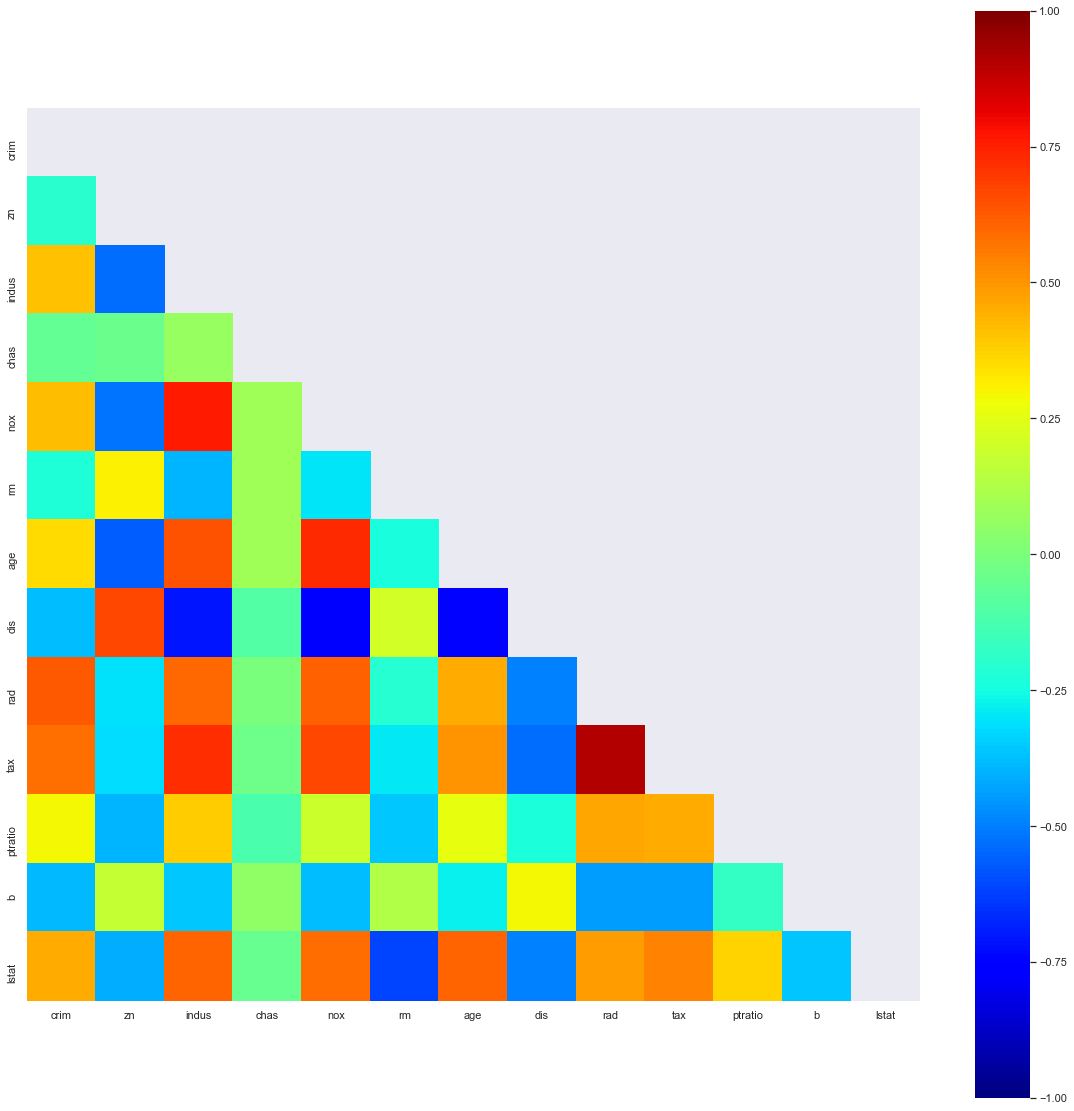

In [48]:
#4. Now, you have the numbers from the correlation matrix, but it's not as easy to view or interpret as a plot. Please write codes to plot correlations by color same as (similar with) the following figure'
plt.figure(figsize=(20,20))
a=np.triu(df.corr())
sns.heatmap(df.corr(),vmin=-1,vmax=1,center=0,cmap='jet',square=True,mask=a)

<AxesSubplot:>

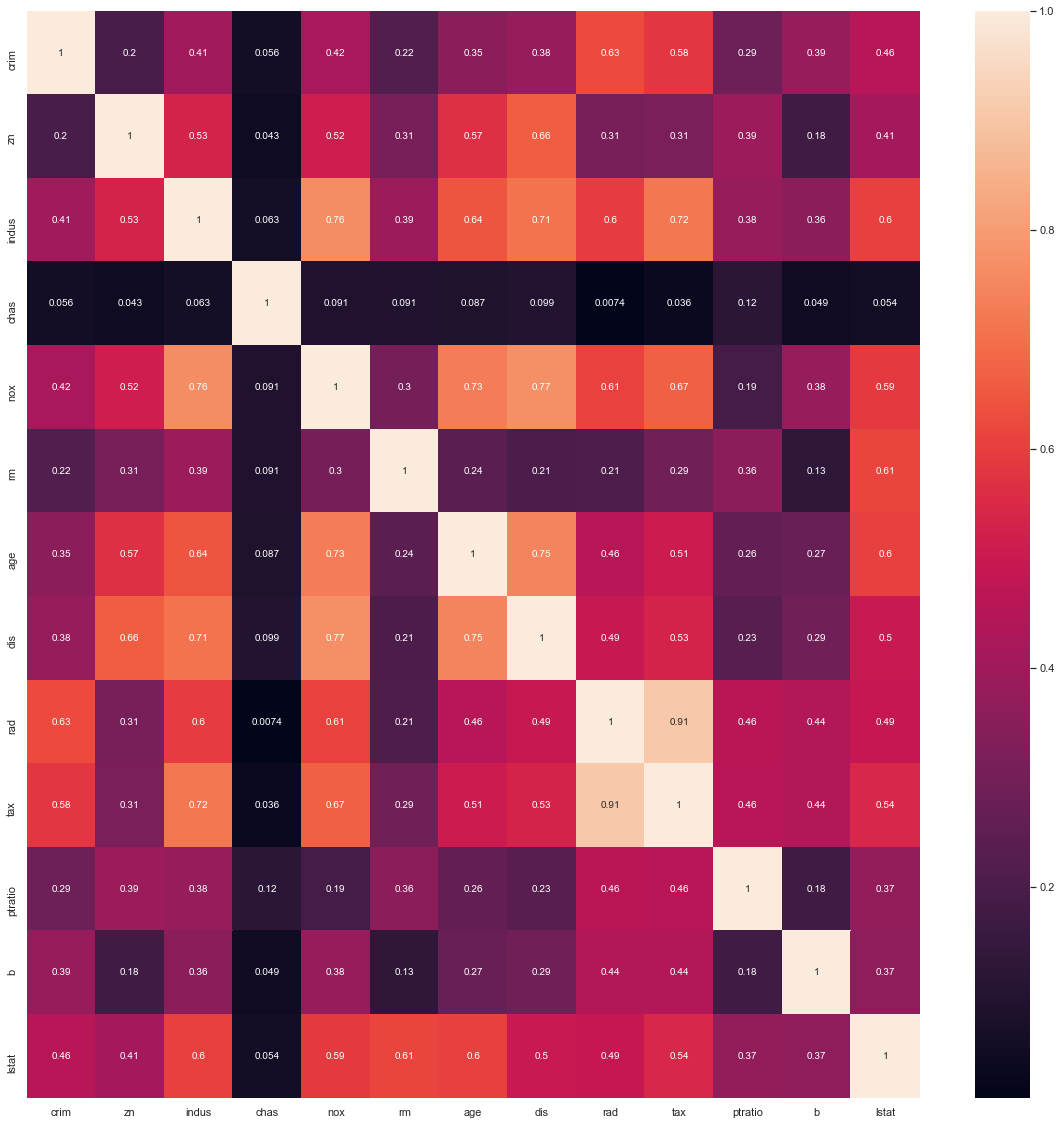

In [24]:
#5. According to your output, answer the following questions:
        #In the above plot, what features are highly correlated? Which features are highly uncorrelated?
#Features that are highly correlated are 

plt.figure(figsize=(20,20))
sns.heatmap(df.corr().abs(), annot=True)

#Next, building the Linear Regression Model
First, please split the data into two datasets as training and test sets. According to the four steps taught 
in the classes, please train the model by linear regression and predict.
Please print the coefficient for your model from the above results. 
It requires you print each element of the coefficient and the corresponding the feature names.
Finally, to gain an understanding of how your model is performing, please score the model against 2 metrics:
R squared and mean squared error. Write the lines of code to get your output; and answer the questions:
    (a) What do the metrics of R Squared and Mean Squared Error? What are the numbers telling you?
    (b) What you think could improve the model?

In [49]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
X=df
y=x['target'] 

X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.4,random_state=5)
lr=linear_model.LinearRegression()
lr.fit(X_train,y_train)
y_pred = lr.predict(X_test)
print("Predicted values: ", y_pred)
print("training data set Score: ", lr.score(X_train,y_train))
print("test data set Score: ", lr.score(X_test,y_test))

#printing the model coefficients of the model
print(list(zip(lr.coef_,df.columns)))

Predicted values:  [37.78027682 30.7334829  27.37516262  7.10263217 34.22154586  5.8799904
 26.77816137 30.02467659 26.72375194 22.31947276 32.98845028 21.68041491
 23.10922174 33.71468332 28.11504404 16.09948011  0.83962899 17.69449633
 14.98496959 10.05285706  3.91430682 18.92047053 38.98612987 24.46273722
 32.10298785 11.57359018 24.83377248 23.55500853 22.65435092 21.2593706
 16.23259188  7.91865536 17.11214529 23.31791972 29.41820066 18.4029659
 28.56800428  9.12158838 42.23882044 33.609832   19.71337562  5.07046288
 29.53910515 11.9987257  27.32144206 30.92174203 -5.45976568 19.47274859
 21.10952276 14.23293096 20.6848422  20.31821658 23.81403423 14.27942784
 17.11462321 24.79919335 36.20880663 15.5732636  28.69195164 22.1548163
 20.76381167 26.19087475 14.34991376 31.78346992 19.97879819 11.68372242
 19.89698388 25.45748554 21.99246212 20.63204762 20.76655044 26.19595529
 18.04438011 19.21938045 17.82082684 25.56083172 21.64245532 15.68000869
 35.51344754 17.46160029 22.01017555

In [50]:
from sklearn import metrics
merr=metrics.mean_squared_error(y_test,y_pred)
print("the mean squared error is {} ".format(merr))
rerr=np.sqrt(metrics.mean_squared_error(y_test,y_pred))
print("the root mean squared error is {}".format(rerr))
r_sqrd=metrics.r2_score(y_test,y_pred)
print("the R squared error is " ,r_sqrd)

the mean squared error is 29.03195842132502 
the root mean squared error is 5.38813125502015
the R squared error is  0.6793836995445844


In [ ]:
#(a) What do the metrics of R Squared and Mean Squared Error? What are the numbers telling you?


Ans:R-squared is a statistical measure of how close the data are to the fitted regression line.
It is also known as the coefficient of determination, or the coefficient of multiple determination for multiple regression.
The MAE measures the average magnitude of the errors in a set of forecasts, without considering their direction. It measures accuracy for continuous variables. The MAE is a linear score which means that all the individual differences are weighted equally in the average.
Mean square error  is the average of the square of the errors. The larger the number the larger the error.

In [ ]:
#(b) What you think could improve the model?

Ans:We can drop the Column "CHAS" from training data set and reducing the test_size .from 0.4 to 0.2 the model performance can be improved.